# GDP and Life Expectancy Analysis

## Introduction  
This project explores the relationship between **GDP per capita** and **life expectancy** across different countries and years. The aim is to understand how economic development and health outcomes are connected, and whether wealthier nations always enjoy longer lives.  

## Dataset  
I will be using the dataset **`all_data.csv`**, which contains information on GDP and life expectancy across multiple countries and years. This dataset allows us to examine both overall trends and country-level differences.  

I have also imported another dataset called **`population.csv`** and merged it with **`all_data.csv`** in order to calculate GDP per capita. This allows us to examine the impact on life expectancy relative to a countries GDP.

## Research Questions  
In this analysis, I plan to investigate the following:  
- Is there a relationship between GDP and life expectancy? How does this relationship differ between countries?
- How has this changed over time? Has life expectancy increased or decreased?
- Do the richer countries always have longer life expectancies? Which country seems to achieve the highest life expectancy relative to its GDP? 
- What was the gap in life expectancy between the highest and lowest country in the year 2000 versus 2015? Did that gap widen or narrow over time?

## Goal  
By the end of this project, I aim to summarize key insights about the relationship between GDP and life expectancy, highlight interesting patterns or outliers, and build a foundation for further exploration of health and economic data.

## Data Overview

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import data
gdp_life_df = pd.read_csv('all_data.csv')
population_df = pd.read_csv('populations.csv')

# View first couple rows to see structure of DF
print(gdp_life_df.head())
print(population_df.head())

# Clean population_df in order to be able to merge the datasets
# Change formatting to match gdp_life_df
population_df_clean = pd.melt(
    population_df,
    id_vars=['Country Name'],
    var_name='Year',
    value_name='Population')

# Convert 'Year' column from object to int
population_df_clean['Year'] = population_df_clean['Year'].astype(int)

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
    Country Name        2000        2001        2002        2003        2004  \
0          Chile    15503635    15683849    15857925    16024752    16187322   
1          China  1262645000  1271850000  1280400000  1288400000  1296075000   
2        Germany    82211508    82349925    82488495    82534176    82516260   
3         Mexico    98625552   100099099   101548624   102978515   104394131   
4  United States   282162411   284968955   287625193   290107933   292805298   

         2005        2006        2007        2008        2009        2010  \
0    16348778    16509195    16671581    16838988    17009

In [81]:
# Overview of data
print(gdp_life_df.info())
print(population_df_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country Name  96 non-null     object
 1   Year          96 non-null     int64 
 2   Population    96 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 2.4+ KB
None


## Data Cleaning & Preparation

There doesnt seem to be any missing values within the table based on the overview of the data.

There doesnt seem to be any type conversions required as all columns are in the appropriate data type

In [94]:
# Renaming appropriate columns
gdp_life_df.rename(columns={'Life expectancy at birth (years)': 'Life_Expectancy'}, inplace=True)
population_df_clean.rename(columns={'Country Name': 'Country'}, inplace=True)

# Check if column name has been changed
print(gdp_life_df.head(1))
print(population_df_clean.head(1))

# Match United States
population_df_clean.replace('United States', 'United States of America', inplace=True)

# Merge tables together
gdp_life_pop_df = pd.merge(
    gdp_life_df,
    population_df_clean,
    on=['Country', 'Year'])

# Check merge was successful
print(gdp_life_pop_df.head())

  Country  Year  Life_Expectancy           GDP
0   Chile  2000             77.3  7.786093e+10
  Country  Year  Population
0   Chile  2000    15503635
  Country  Year  Life_Expectancy           GDP  Population
0   Chile  2000             77.3  7.786093e+10    15503635
1   Chile  2001             77.3  7.097992e+10    15683849
2   Chile  2002             77.8  6.973681e+10    15857925
3   Chile  2003             77.9  7.564346e+10    16024752
4   Chile  2004             78.0  9.921039e+10    16187322


## Exploratory Data Analysis

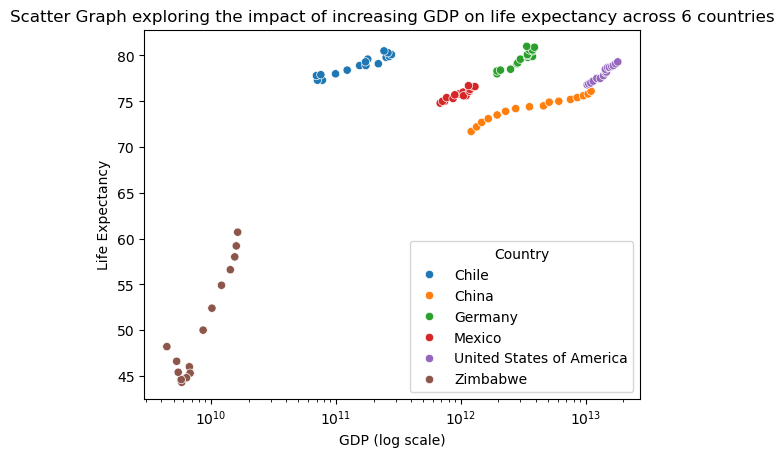

<Figure size 640x480 with 0 Axes>

In [93]:
# Relationship between GDP and Life Expectancy
sns.scatterplot(x='GDP', y='Life_Expectancy', hue='Country', data=gdp_life_pop_df)
plt.xscale('log')

# Labelling and title
plt.xlabel('GDP (log scale)')
plt.ylabel('Life Expectancy')
plt.title('Scatter Graph exploring the impact of increasing GDP on life expectancy across 6 countries')
plt.show()
plt.clf()

In [96]:
# Function to plot all countries
def country_gdp_life (num_rows, num_columns, df):
    plt.figure(figsize=(10, 8))
    country = df.Country.unique()
    for i in range(0, len(country)):
        plt.subplot(num_rows, num_columns, i+1)
        plt.scatter(df.GDP[df.Country == country[i]], df.Life_Expectancy[df.Country == country[i]])
        plt.xlabel('GDP')
        plt.ylabel('Life Expectancy')
        plt.title(country[i])
    plt.tight_layout()
    plt.show()
    plt.clf()

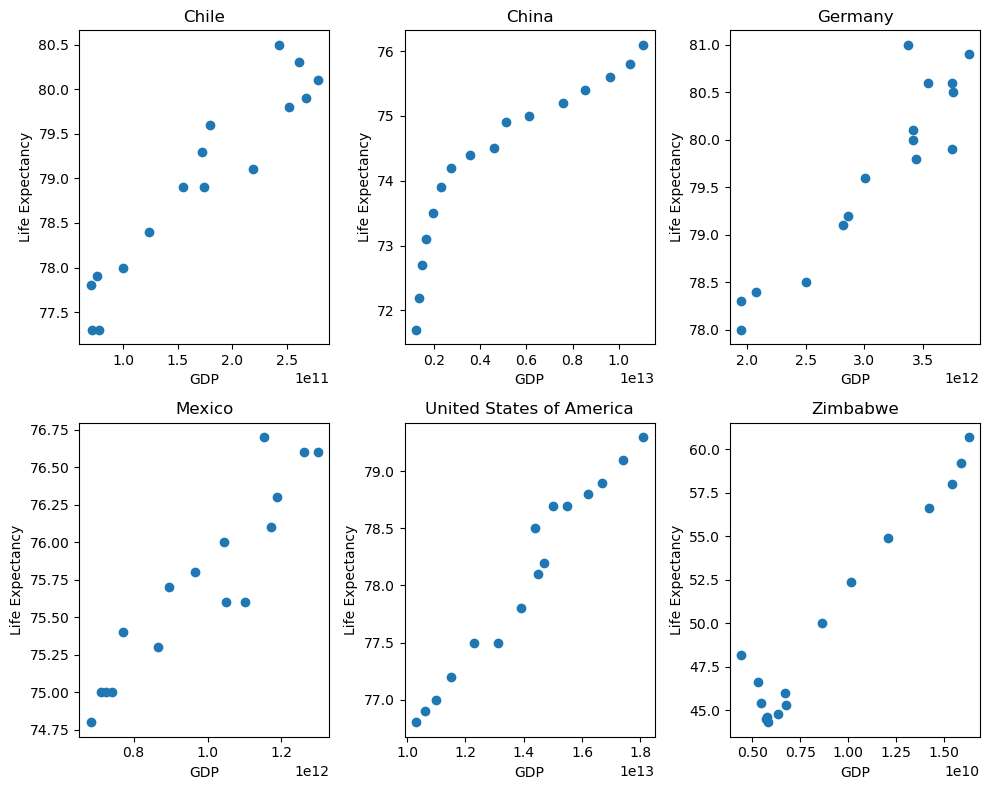

<Figure size 640x480 with 0 Axes>

In [97]:
# Relationship between GDP and Life Expectancy in individual countries
country_gdp_life(2, 3, gdp_life_pop_df)

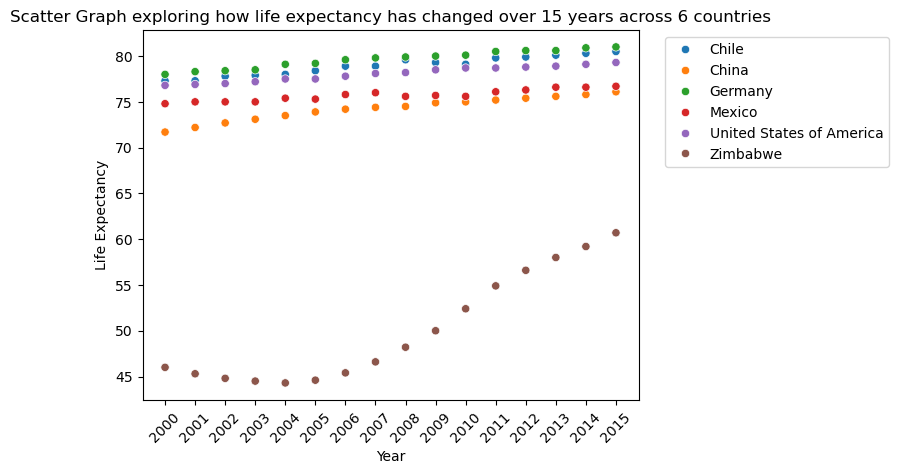

<Figure size 640x480 with 0 Axes>

In [98]:
# Relationship between year and life expectancy
sns.scatterplot(x='Year', y='Life_Expectancy', hue='Country', data=gdp_life_pop_df)

# Labelling and title
plt.xticks(gdp_life_pop_df.Year.unique(), rotation=45)
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title('Scatter Graph exploring how life expectancy has changed over 15 years across 6 countries')
plt.legend(bbox_to_anchor=(1.04, 1), loc='upper left')
plt.show()
plt.clf()

## Insights & Findings

## Conclusion